# Bayesian inference for the rice distribution

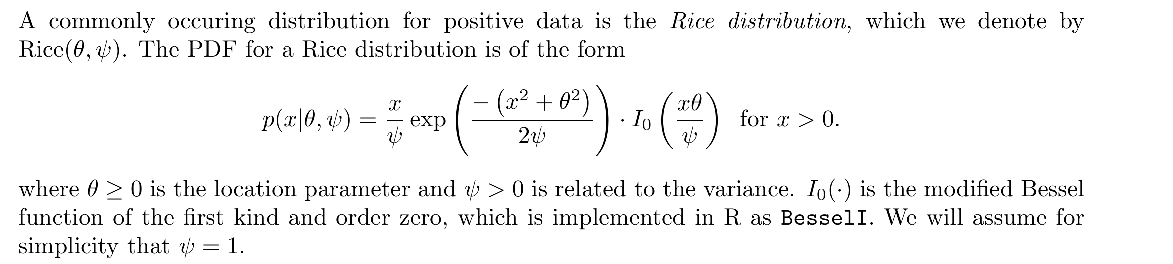

# a
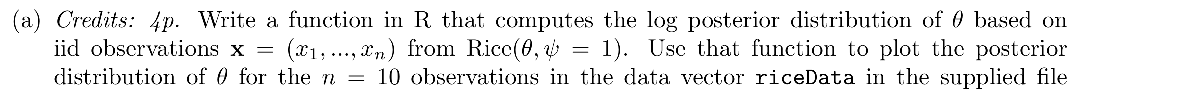

In [1]:
source('ExamData.R')
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: sysfonts
Loading required package: showtextdb


In [2]:
riceData


[1] 1.556 1.861 3.135 1.311 1.877 0.622 3.219 0.768 2.358 2.056

In [3]:
loglik <- function (x,theta,psi=1){
    
    log(x/psi) - (x**2 + theta**2)/2 + log(besselI(x = theta*x/psi,nu = 0))
}

we assumed a noninformative prior for theta and psi.

In [4]:
logposterior = function(theta,data){
    sum(loglik(x=data,theta,psi = 1)) + 0
}



In [5]:
lentheta = 0.01
thetagrid = seq(from = 0,to = 3 , lentheta)

In [6]:
post_sample = numeric(length(thetagrid) )

In [7]:
# count = 0
# for (i in thetagrid){
     
#     count = count + 1
#     Post[count] = logposterior(riceData,i)
#     print(i)
post_sample = sapply(1:length(thetagrid), FUN = function(i) post_sample[i] = logposterior(data = riceData,
                                                                                          theta = thetagrid[i]))


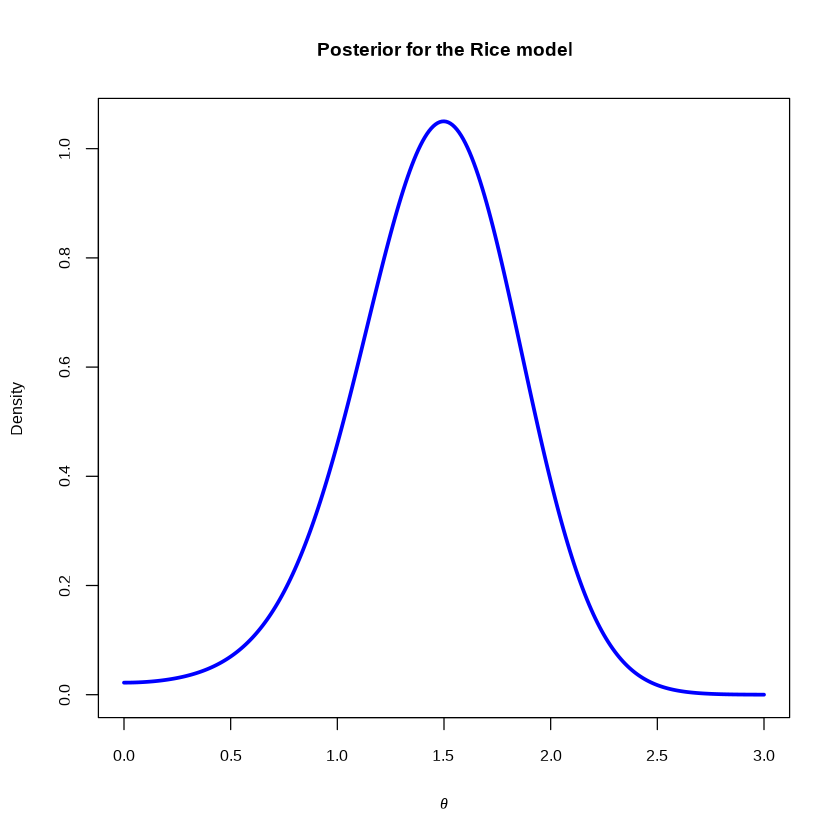

In [8]:
plot(x = thetagrid, y= 1/lentheta*exp(post_sample)/sum(exp(post_sample)),type='l',col='blue',lwd=3,
        ylab = 'Density', xlab = expression(theta),main="Posterior for the Rice model")

## b

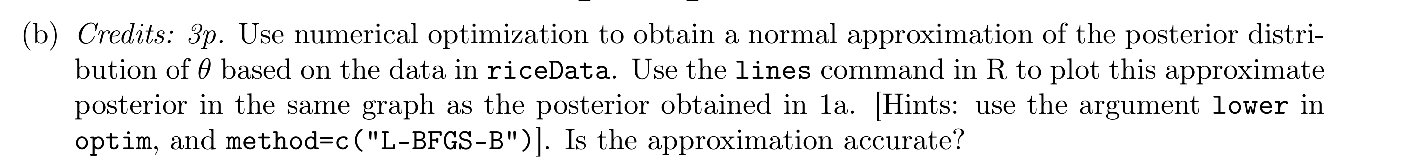

In [16]:
InitVal = mean(riceData)
optRes = optim(par = InitVal,fn = logposterior,data=riceData,gr = NULL,hessian = TRUE,method = c('L-BFGS-B'),lower = 0,
                  control=list(fnscale=-1) )

In [19]:
postMod = optRes$par #posterior Mode
postsd = sqrt(-1/optRes$hessian) # Approximate posterior standard deviation

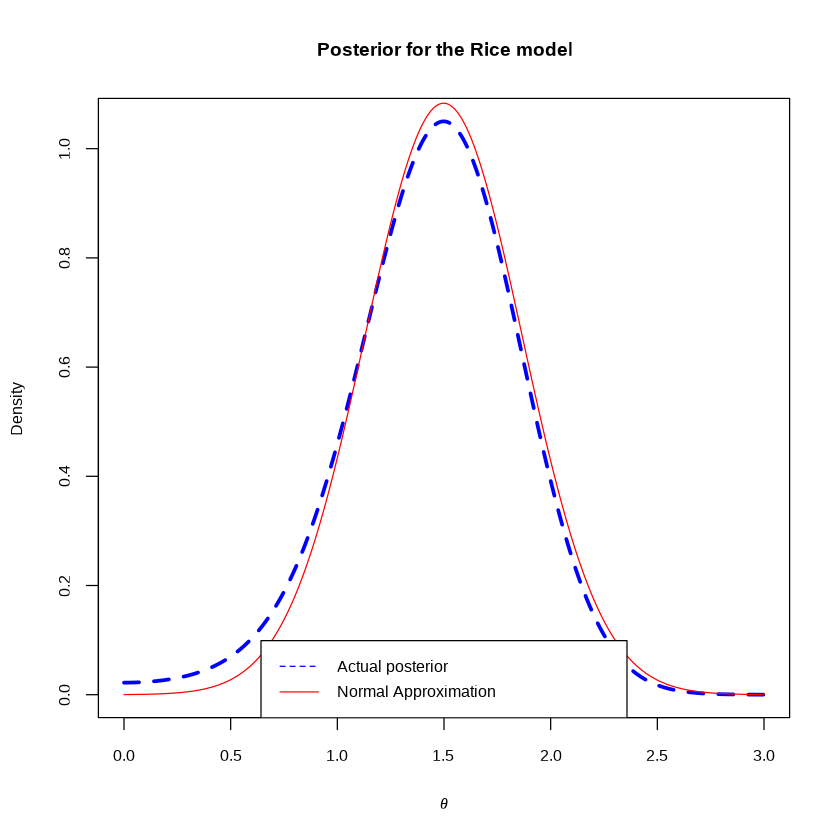

In [32]:
plot(x = thetagrid, y= 1/lentheta*exp(post_sample)/sum(exp(post_sample)),type='l',col='blue',lwd=3,lty = 2
        ,ylab = 'Density', xlab = expression(theta),main="Posterior for the Rice model")
lines(x = thetagrid,y = dnorm(x = thetagrid,mean = postMod,sd = postsd ),col = 'red')
legend(col = c('blue','red'),lty=c(2,1),x='bottom',legend = c("Actual posterior","Normal Approximation"))